In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
import CM4Xutils
CM4Xutils.__version__

'0.3.0'

In [49]:
import warnings
import dask
import xarray as xr
import matplotlib.pyplot as plt

import doralite
import gfdl_utils.core as gu

In [50]:
import sys
sys.path.insert(1, '../scipts')
from scripts.remap_functions import remap_budgets_to_sigma2_and_coarsen

In [51]:
grid = CM4Xutils.load_wmt_grid(
    "CM4Xp125",
    interval=str(1750),
    dmget=True
)

Loading CM4Xp125-piControl-spinup for interval `1750`.
Issuing dmget command to migrate data to disk. Migration complete.


/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


Issuing dmget command to migrate data to disk. Migration complete.


/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


Skipping variable average_DT because `cell_methods` attribute not defined.
Skipping variable average_T1 because `cell_methods` attribute not defined.
Skipping variable average_T2 because `cell_methods` attribute not defined.
Skipping variable time_bnds because `cell_methods` attribute not defined.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Overriding CM4Xp125 grid coordinates from supergrid.
Regridding ice
Skipping variable average_DT because `cell_methods` attribute not defined.
Skipping variable average_T1 because `cell_methods` attribute not defined.
Skipping variable average_T2 because `cell_methods` attribute not defined.
Skipping variable time_bnds because `cell_methods` attribute not defined.
Inferring Z grid coordinate: depth `z_`


/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


In [52]:
ds = remap_budgets_to_sigma2_and_coarsen("CM4Xp125", 1850)
display(ds)

Loading CM4Xp125-piControl for interval `1850`.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Skipping average_DT because independent of 'X' and 'Y' dims.
Skipping average_T1 because independent of 'X' and 'Y' dims.
Skipping average_T2 because independent of 'X' and 'Y' dims.
Skipping time_bnds because independent of 'X' and 'Y' dims.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Loading CM4Xp125-historical for interval `1850`.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Skipping average_DT because independent of 'X' and 'Y' dims.
Skipping average_T1 because independent of 'X' and 'Y' dims.
Skipping average_T2 because independent of 'X' and 'Y' dims.
Skipping

<xarray.Dataset> Size: 27GB
Dimensions:                         (exp: 2, yh: 112, xh: 120, time: 60,
                                     sigma2_l: 74, time_bounds: 61, xq: 121,
                                     yq: 113, sigma2_i: 75)
Coordinates: (12/30)
  * exp                             (exp) object 16B 'forced' 'control'
    geolon                          (yh, xh) float64 108kB dask.array<chunksize=(112, 120), meta=np.ndarray>
    lon                             (yh, xh) float64 108kB dask.array<chunksize=(112, 120), meta=np.ndarray>
    geolat                          (yh, xh) float64 108kB dask.array<chunksize=(112, 120), meta=np.ndarray>
    lat                             (yh, xh) float64 108kB dask.array<chunksize=(112, 120), meta=np.ndarray>
    deptho                          (yh, xh) float64 108kB dask.array<chunksize=(112, 120), meta=np.ndarray>
    ...                              ...
  * xh                              (xh) int64 960B 0 1 2 3 ... 116 117 118 119
  * yh                              (yh) int64 896B 0 1 2 3 ... 108 109 110 111
  * xq                              (xq) int64 968B 0 1 2 3 ... 117 118 119 120
  * yq                              (yq) int64 904B 0 1 2 3 ... 109 110 111 112
  * sigma2_i                        (sigma2_i) float64 600B -3.0 11.49 ... 39.0
    rho2_i                          (sigma2_i) float64 600B dask.array<chunksize=(75,), meta=np.ndarray>
Data variables: (12/52)
    thkcello                        (exp, time, sigma2_l, yh, xh) float64 955MB dask.array<chunksize=(2, 60, 74, 112, 120), meta=np.ndarray>
    thkcello_bounds                 (exp, time_bounds, sigma2_l, yh, xh) float64 971MB dask.array<chunksize=(2, 61, 74, 112, 120), meta=np.ndarray>
    S_advection_xy                  (exp, time, sigma2_l, yh, xh) float64 955MB dask.array<chunksize=(2, 60, 74, 112, 120), meta=np.ndarray>
    Sh_tendency_vert_remap          (exp, time, sigma2_l, yh, xh) float64 955MB dask.array<chunksize=(2, 60, 74, 112, 120), meta=np.ndarray>
    T_advection_xy                  (exp, time, sigma2_l, yh, xh) float64 955MB dask.array<chunksize=(2, 60, 74, 112, 120), meta=np.ndarray>
    Th_tendency_vert_remap          (exp, time, sigma2_l, yh, xh) float64 955MB dask.array<chunksize=(2, 60, 74, 112, 120), meta=np.ndarray>
    ...                              ...
    LSNK                            (exp, time, yh, xh) float64 13MB dask.array<chunksize=(2, 60, 112, 120), meta=np.ndarray>
    LSRC                            (exp, time, yh, xh) float64 13MB dask.array<chunksize=(2, 60, 112, 120), meta=np.ndarray>
    RAIN                            (exp, time, yh, xh) float64 13MB dask.array<chunksize=(2, 60, 112, 120), meta=np.ndarray>
    SNOWFL                          (exp, time, yh, xh) float64 13MB dask.array<chunksize=(2, 60, 112, 120), meta=np.ndarray>
    siconc                          (exp, time, yh, xh) float64 13MB dask.array<chunksize=(2, 60, 112, 120), meta=np.ndarray>
    sithick                         (exp, time, yh, xh) float64 13MB dask.array<chunksize=(2, 60, 112, 120), meta=np.ndarray>
Attributes:
    filename:            ocean_monthly_z_d2.185001-185412.S_advection_xy.nc
    title:               CM4_historical_c192_OM4p125
    grid_type:           regular
    grid_tile:           N/A
    associated_files:    areacello: 18500101.D2ocean_static.nc
    history:             Fri Jun  9 01:32:07 2023: ncatted -O -a associated_f...
    NCO:                 netCDF Operators version 5.0.1 (Homepage = http://nc...
    external_variables:  volcello
    model:               CM4Xp125
    description:         The CM4Xp125 experimental design following Griffies ...
    provenance:          Diagnostics have been conservatively remapped into m...

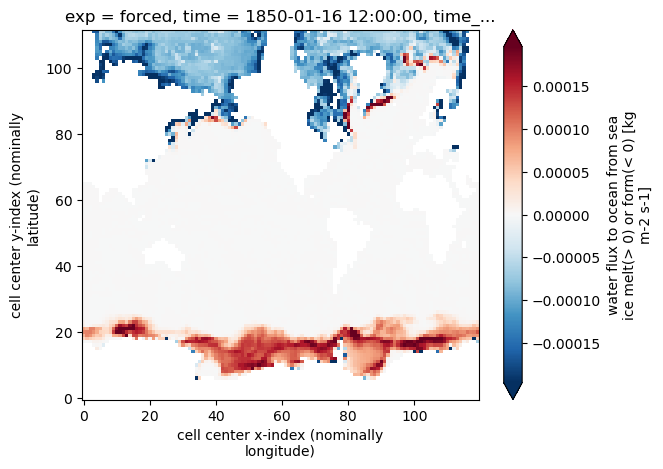

In [53]:
ds["fsitherm"].isel(exp=0, time=0).plot(robust=True)

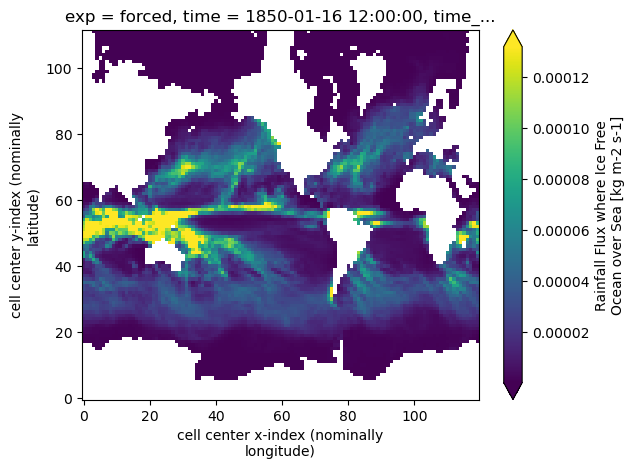

In [54]:
ds["prlq"].isel(exp=0, time=0).plot(robust=True)

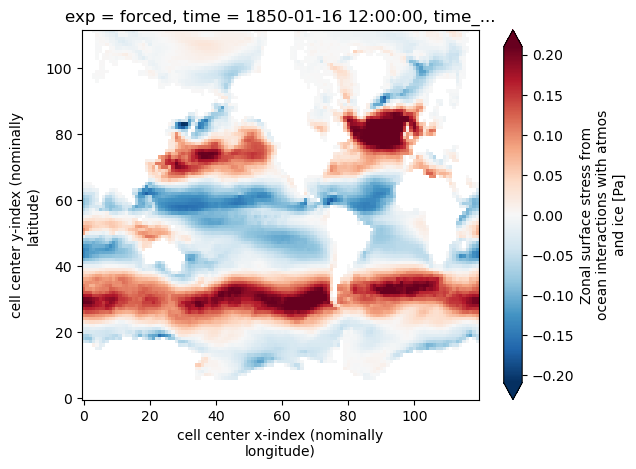

In [55]:
ds["taux"].isel(exp=0, time=0).plot(robust=True)

In [63]:
rsdoabsorb_example = ds["rsdoabsorb"].isel(exp=0, time=0).compute()

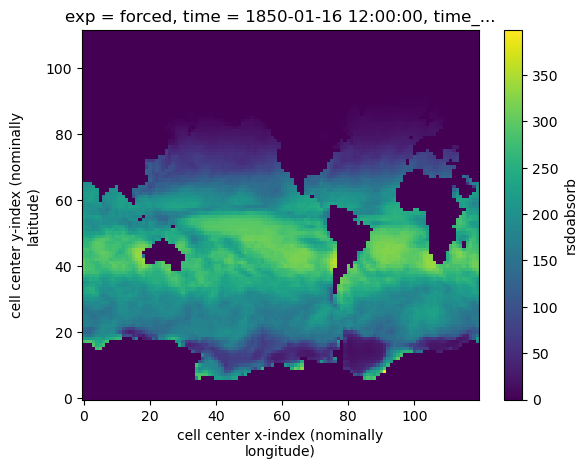

In [64]:
rsdoabsorb_example.sum("sigma2_l").plot()